<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation functions in neural networks

🤔 Activation Functions are an important part of Neural Networks!

🧠 Each neuron in a neural network performs a simple operation on the numbers it receives as input. But for the network to learn, the output must vary slightly with the inputs.

💡 This is where Activation Functions come in! They introduce nonlinearity to allow the network to learn complex patterns.

😀 The most common one is the Rectified Linear Unit (ReLU). It outputs the input directly if it is positive, but outputs 0 if the input is negative: f(x) = max(0,x)

😮 This lets outputs grow as inputs increase, but doesn’t grow without limit like other functions. It adds just the right amount of nonlinearity!

🤓 sigmoid and tanh are also popular. Sigmoid squashes numbers between 0-1: f(x)=1/(1+e-x) Tanh maps to -1 to 1: f(x)=2σ(x)-1

😎 These “squash” outputs to control growth and prevent exploding or vanishing values during training.

🥳 With activation functions introducing nonlinearity, neural networks can learn incredibly complex patterns just like our amazing brains! 🧠


Here are some common types of activation functions used in TensorFlow:

💪 Rectified Linear Unit (ReLU): f(x) = max(0, x)

    Most widely used activation function. Works well for both shallow and deep networks.

🙂 Sigmoid: f(x) = 1/(1+e-x)

    Squashes the output to range between 0-1. Used for probability predictions in the output layer.

🤙 Tanh (Hyperbolic Tangent): f(x) = (e^x – e^-x)/(e^x + e^-x)

    Squashes output to range -1 to 1. ReLU often works better than tanh in hidden layers.

🤓 Softmax: f(x)_i = e^{x_i} / ∑_j e^{x_j}

    Used for multi-class classification where the outputs represent class probabilities.

😎 Leaky ReLU: f(x) = max(αx, x) where α is a small positive value like 0.01

    Solves the “dying ReLU” problem where a unit may stop learning if its input is negative.

😎 ELU (Exponential Linear Unit): f(x) = x for x > 0, f(x) = α(e^x – 1) for x < 0

    Slightly better than ReLU by allowing negative values close to zero.

So in summary, ReLU, sigmoid, tanh are commonly used in hidden layers while softmax is popular in output layers for classification tasks.

# General Rule of Sum when to use which function

Use Sigmoid function when you want to use a binary output
Use Tanh function when you want to use a binary output
Use Softmax function when you want to use a multi-class output
Use ReLU function when you want to use a multi-class output
Use Leaky ReLU function when you want to use a multi-class output
Use ELU function when you want to use a multi-class output
Use SELU function when you want to use a multi-class output
Use Softplus function when you want to use a multi-class output
Use Softsign function when you want to use a multi-class output


# As per lecture

Use Sigmoid function in output layer
Use Tanh function in all other places (But both of these suffers from vanishing graident problem)

Therefore,

ReLU can be use in place of both Sigmoid and Tanh. ReLU is most popular function for hidden layers.
Computationally effective math due to its simplicity. However it also suffers from vanishing gradient problem. (Vanishing gradient problem is a problem that occurs when the gradient of a function becomes very small as it is propagated backwards through a neural network. This can cause the optimization algorithm to converge slowly or not at all)

Leaky ReLU or Parametric ReLU can be used here to reduce the vanishing gradient problem.


# Activation Functions for Hidden Layers
 A hidden layer is a layer that is not the input layer or the output layer. It is a layer that is between the input layer and the output layer. It is a layer that is used to transform the input data into the output data. It is a layer that is used to make the model more complex. It is a layer that is used to make the model more accurate. It is a layer that is used to make the model more efficient. It is a layer that is used to make the model more robust. It is a layer that is used to make the model more flexible. It is a layer that is used to make the model more powerful.

Most commonly used activation functions for hidden layers are,
1. Rectified Linear Activation (ReLU)
2. Logistic (Sigmoid)
3. Hyperbolic Tangent (Tanh)

Choosing the best activation function is dependent on several factors some general rules includes:
1. A neural network will almost always have the same activation function in all hidden layers.
2. In early 90s sigmoid was the default function later from 90s to 2010 Tanh function became the default. But both suffered from vanishing gradient problem.
3. In modern neural network models such as MLP (Multi Layer Perceptron) and CNN (Convolutional Neural Network) ReLU function is the default activation function.
4. However, Recurrent Neural Network (RNN) and Long Short Term Memory (LSTM) still use the sigmoid and Tanh function. 


# Activation Functions for Output Layer
 An output layer is a layer that is the last layer of a neural network. It is a layer in a neural network model that directly predicts the output. All feed-forward neural network models have an output layer. Most widely used output layers are:
1. Linear Activation function
2. Sigmoid Activation function
3. Softmax 

Always choose the output function absed on your problem. There are typically two types of problems.
1. Classification problems
2. Regression problems

If its a regression problem then you can use linear activation function and if its a classification problem then you can use sigmoid or softmax activation function. In classification problem it is always based on probability instead of absolute value or regression problem. Therefore you can use the follwoing:
1. rounding (Sigmoid)
2. argmax (Softmax)

If there are two mutually exclusive classes (binary classification) use Sigmoid function.
If there are more than two or multiclass exclusive classes (multiple classification) use Softmax function.

However, when there are two or more mutually inclusive classes(Multilabel classification) then use Sigmoid function.

# Ungraded Lab: Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.

In [1]:
import tensorflow as tf

print(tf.__version__)

c:\ProgramData\anaconda3\envs\tf_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


2.19.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

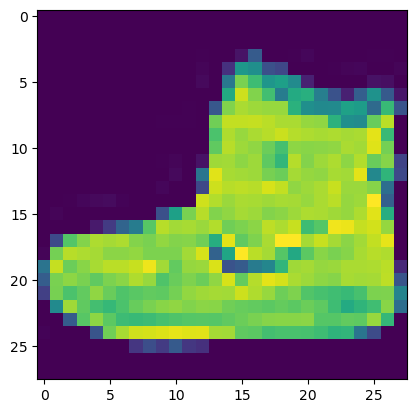

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f"LABEL: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n {training_images[index]}")

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [5]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [6]:
# Build the classification model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [7]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f"input to softmax function: {inputs.numpy()}")

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f"output of softmax function: {outputs.numpy()}")

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f"sum of outputs: {sum}")

# Get the index with highest value
prediction = np.argmax(outputs)
print(f"class with highest probability: {prediction}")

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7823 - loss: 0.6262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.3859
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3353
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8847 - loss: 0.3127
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8909 - loss: 0.2964


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.8908`. This tells you that your neural network is about 89% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [9]:
# Evaluate the model on unseen data


model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.3556


[0.3690967559814453, 0.8708000183105469]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[6.3123832e-07 8.7637249e-09 3.9259511e-08 8.1793281e-08 1.4622098e-07 8.3313575e-03 1.1522459e-06 5.9098709e-02 1.8993094e-05 9.3254876e-01]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [11]:
print(test_labels[0])

9


### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

</p>
</details>

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [12]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            1024, activation=tf.nn.relu
        ),  # Try experimenting with this layer
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3092
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0748
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2.0935234e-09 8.0711011e-09 1.9952676e-08 5.1199231e-07 9.8568255e-14 5.6207516e-10 1.5543477e-13 9.9999952e-01 2.3539284e-09 5.4106670e-09]
7


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [13]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),  # Try removing this layer
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4925
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1584
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0652
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1085
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
[1.2313014e-06 2.2437672e-09 1.1943974e-04 1.1697881e-03 2.7724170e-09 6.1394680e-06 8.8639816e-14 9.9868101e-01 1.5663669e-06 2.0787766e-05]
7


### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [14]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(
            10, activation=tf.nn.softmax
        ),  # Try experimenting with this layer [findings suggest error since there are 10 layers of dataset in mnist dataset not 5]
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4926
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1599
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1108
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0862
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0677
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0940  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
[6.4475998e-08 3.6376955e-09 5.5599419e-05 3.0750718e-05 6.7772551e-11 2.0071087e-07 1.5241888e-12 9.9990821e-01 1.1297027e-06 4.0928135e-06]
7


### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

<details><summary>Click for Answer</summary>
<p>

#### Answer 
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

</p>
</details>

In [15]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        # Add a layer here,
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.GaussianNoise(0.1),  # Additional layer added here
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0636
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0457
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0791
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1.3935275e-10 1.7495105e-09 7.2850622e-07 3.9328288e-06 4.7256692e-13 1.3056992e-10 5.5449653e-14 9.9999535e-01 2.3804396e-09 3.4314844e-08]
7


### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [16]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(
    training_images, training_labels, epochs=5
)  # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1212
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0568
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0458
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.4037886e-10 1.2744204e-06 4.9688744e-05 2.1808521e-05 3.8720754e-12 1.0649910e-11 1.1266963e-12 9.9992633e-01 7.5926647e-07 1.0387541e-07]
7


### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [17]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# Experiment with removing this line
test_images = test_images / 255.0  # Experiment with removing this line
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

# by not normalizing the loss got very high and the end values are to low

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 8.0106
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3206
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2414
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2512
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2794
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.1439085  0.06490333 0.09603492 0.08165262 0.06878975 0.06774769 0.06305869 0.08018782 0.21081428 0.12290243]
7


### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(
    tf.keras.callbacks.Callback
):  # class is a function which has functions inside it
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") >= 0.6:  # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.5940
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7936 - loss: 0.5937
